# **ML-Based Classification of Personality Traits from Social and Behavioral Data**

**Overview**

The Extrovert vs. Introvert Personality Traits Dataset is a comprehensive collection of behavioral and social data curated to explore the spectrum of human personality. It captures key indicators of extroversion and introversion, making it a valuable resource for psychologists, data scientists, and researchers focused on social behavior analysis, personality prediction, and data preprocessing techniques.

**Background**

Personality traits such as extroversion and introversion play a significant role in shaping how individuals engage with their social environments. This dataset offers valuable insights into behavioral indicators, including time spent alone, participation in social events, and social media usage. It supports diverse applications across psychology, sociology, marketing, and machine learning. Whether the goal is to predict personality types or to analyze social interaction patterns, this dataset serves as a robust foundation for uncovering meaningful insights.≥

**Features**

- Time_spent_Alone: Hours spent alone daily (0–11).
- Stage_fear: Presence of stage fright (Yes/No).
- Social_event_attendance: Frequency of social events (0–10).
- Going_outside: Frequency of going outside (0–7).
- Drained_after_socializing: Feeling drained after socializing (Yes/No).
- Friends_circle_size: Number of close friends (0–15).
- Post_frequency: Social media post frequency (0–10).
- Personality: Target variable (Extrovert/Introvert).*

In [1]:
# import relevant libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTETomek


## Data Exploration

In [2]:
# load the dataset
personality_df = pd.read_csv("personality.csv")
# read the first five rows 
personality_df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
# print the data information 
personality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [4]:
# check for missing values for each feature
personality_df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [5]:
# remove missing values for each feature
personality_df = personality_df.dropna()

In [6]:
# re-check for missing values for each feature 
personality_df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [7]:
# check for total number of duplicated rows 
personality_df.duplicated().sum()

np.int64(379)

In [8]:
# remove the duplicated rows 
personality_df.drop_duplicates(inplace = True)

In [9]:
# re-check for the total number of duplicated rows 
personality_df.duplicated().sum()

np.int64(0)

In [10]:
# rename the columns 
personality_df = personality_df.rename(columns = {'Time_spent_Alone': 'time_spent_alone', 
                                                  'Stage_fear': 'stage_fear', 
                                                  'Social_event_attendance': 'social_event_attendance', 
                                                  'Going_outside': 'going_outside', 
                                                  'Drained_after_socializing': 'drained_after_socializing', 
                                                  'Friends_circle_size': 'friends_circle_size', 
                                                  'Post_frequency': 'post_frequency', 
                                                  'Personality': 'personality'})
# view the first five rows 
personality_df.head()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


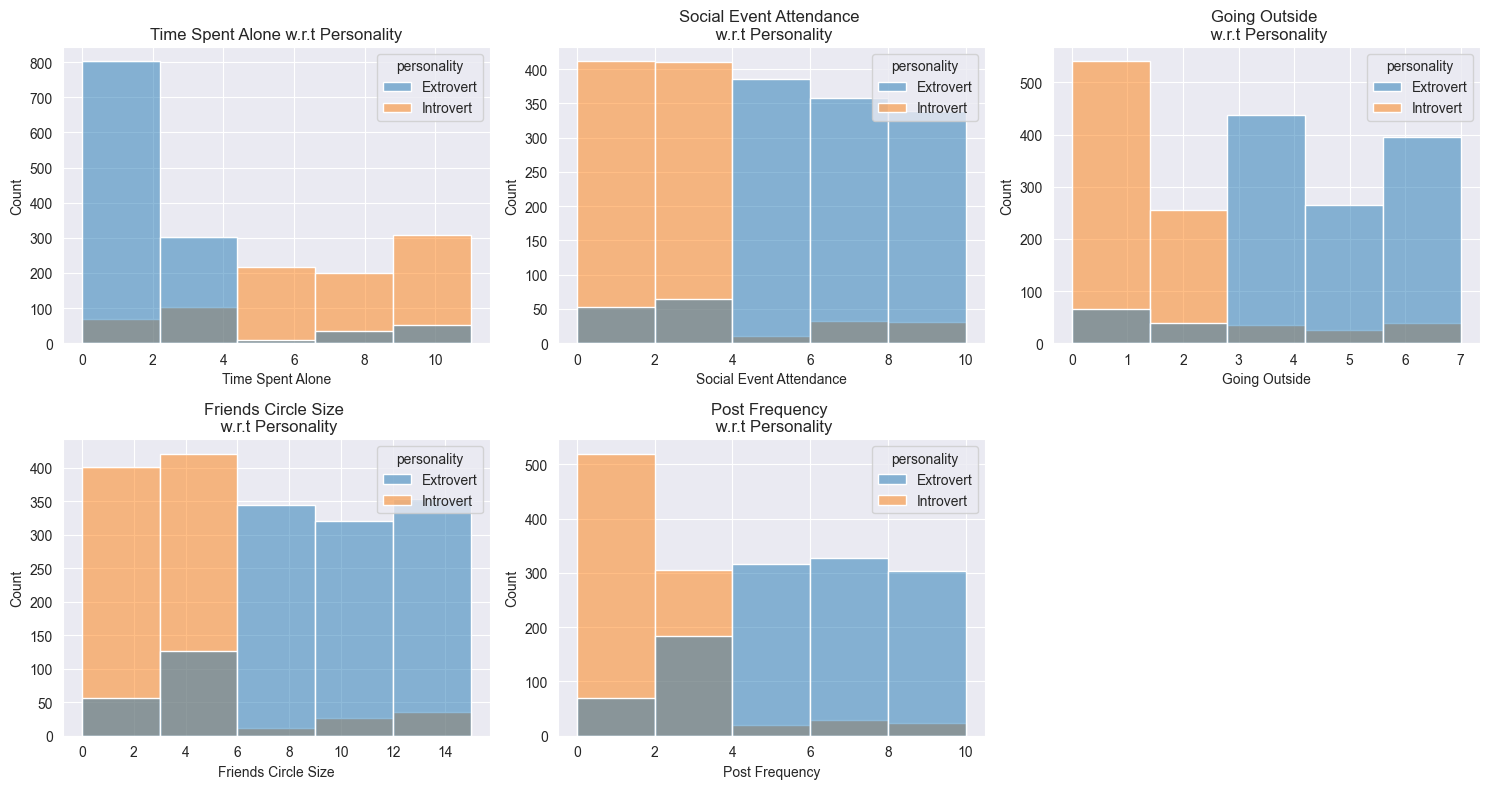

In [11]:
# relationship between the numerical features and the target variable 
sns.set_style("darkgrid")
plt.figure(figsize = (15, 8))
plt.subplot(2, 3, 1)
sns.histplot(x = "time_spent_alone", hue = "personality", bins = 5, data = personality_df)
plt.title("Time Spent Alone w.r.t Personality")
plt.xlabel("Time Spent Alone")

plt.subplot(2, 3, 2)
sns.histplot(x = "social_event_attendance", hue = "personality", bins = 5, data = personality_df)
plt.title("Social Event Attendance \n w.r.t Personality")
plt.xlabel("Social Event Attendance")

plt.subplot(2, 3, 3)
sns.histplot(x = "going_outside", hue = "personality", bins = 5, data = personality_df)
plt.title("Going Outside \n w.r.t Personality")
plt.xlabel("Going Outside")

plt.subplot(2, 3, 4)
sns.histplot(x = "friends_circle_size", hue = "personality", bins = 5, data = personality_df)
plt.title("Friends Circle Size \n w.r.t Personality")
plt.xlabel("Friends Circle Size")

plt.subplot(2, 3, 5)
sns.histplot(x = "post_frequency", hue = "personality", bins = 5, data = personality_df)
plt.title("Post Frequency \n w.r.t Personality")
plt.xlabel("Post Frequency")


plt.tight_layout()
plt.show()

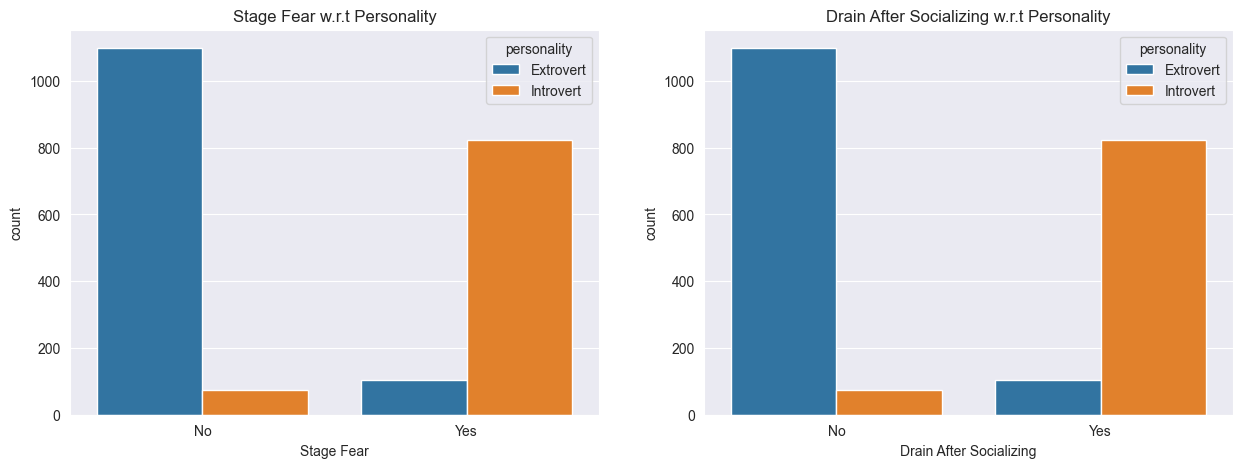

In [12]:
# relationship between the categorical features and target variable 
sns.set_style("darkgrid")
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = "stage_fear", hue = "personality", data = personality_df)
plt.title("Stage Fear w.r.t Personality")
plt.xlabel("Stage Fear")

plt.subplot(1, 2, 2)
sns.countplot(x = "drained_after_socializing", hue = "personality", data = personality_df)
plt.title("Drain After Socializing w.r.t Personality")
plt.xlabel("Drain After Socializing")

plt.show()

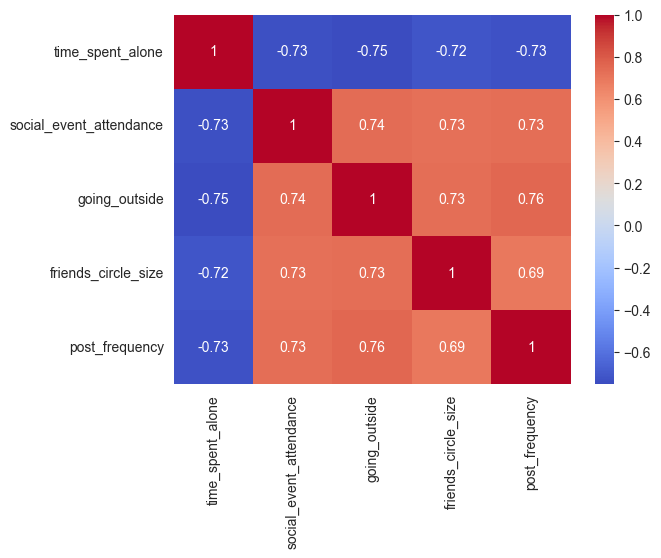

In [13]:
# relationship between the numerical features 
sns.heatmap(personality_df.drop(['stage_fear', 'personality', 'drained_after_socializing'], axis = 1).corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [14]:
# encode the features 
personality_df['stage_fear'] = personality_df['stage_fear'].map({'No': 0, 'Yes': 1})
personality_df['drained_after_socializing'] = personality_df['drained_after_socializing'].map({'No': 0, 'Yes': 1})

## Feature Engineering

In [ ]:
# add social score
personality_df['social_score'] = personality_df['social_event_attendance'] + personality_df['going_outside'] + personality_df['post_frequency']

In [17]:
# add alone to social ratio
personality_df['alone_to_social_ratio'] = personality_df['time_spent_alone'] / (personality_df['going_outside'] + 1)

In [ ]:
# add friendship intensity
personality_df['friendship_intensity'] = personality_df['friends_circle_size'] / (personality_df['post_frequency'] + 1)

In [19]:
# add online to offline ratio
personality_df['online_to_offline_ratio'] = personality_df['post_frequency']/ (personality_df['going_outside'] + personality_df['social_event_attendance'] + 1)

In [20]:
# social density
personality_df['social_density'] = personality_df['friends_circle_size'] * personality_df['post_frequency']

## Features Selection using Decision Trees 

In [22]:
# extract the relevant features 
X_dtc = personality_df.drop(['personality'], axis = 1)
y_dtc = personality_df['personality']

# extract the col names 
X_col = X_dtc.columns

# build the decision trees
dtc = DecisionTreeClassifier(random_state = 2025)
dtc.fit(X_dtc, y_dtc)

# extract the feature importances score 
feature_importance_scores = dtc.feature_importances_

# create a dict to store the feature name and scores 
feature_impt_dict = {'feature_name': X_col, 
                     'feature_importance': feature_importance_scores}

# store it into the dataframe 
feature_impt_df = pd.DataFrame(feature_impt_dict)

# sort the feature importance scores from highest to lowest 
feature_impt_df = feature_impt_df.sort_values(by = "feature_importance", ascending = False)
feature_impt_df


,feature_name,feature_importance
7,social_score,0.745142
8,alone_to_social_ratio,0.046510
11,social_density,0.033147
9,friendship_intensity,0.032333
10,online_to_offline_ratio,0.032215
5,friends_circle_size,0.030765
2,social_event_attendance,0.029698
0,time_spent_alone,0.027946
3,going_outside,0.013678
6,post_frequency,0.008566


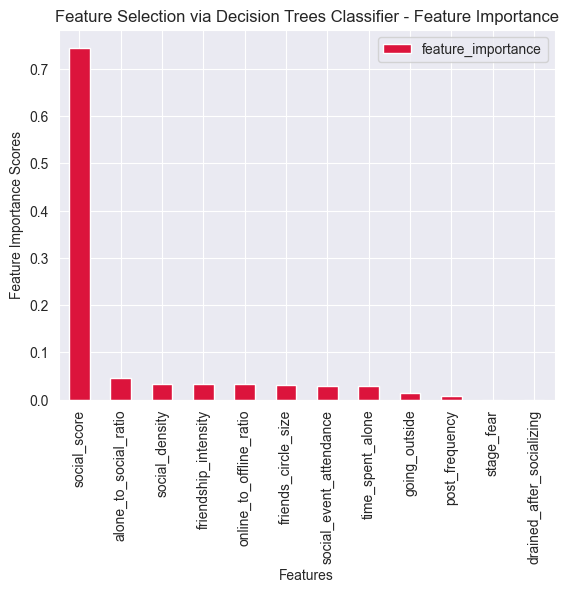

In [23]:
# visualize the feature importances 
feature_impt_df.plot(x = "feature_name", y = "feature_importance", kind = "bar", color = "crimson")
plt.title("Feature Selection via Decision Trees Classifier - Feature Importance")
plt.xlabel("Features")
plt.ylabel("Feature Importance Scores")
plt.show()

In [24]:
# remove the drained_after_socializing from the original datasdet
personality_df = personality_df.drop(['drained_after_socializing', 'stage_fear'], axis = 1)
personality_df.head()

,time_spent_alone,social_event_attendance,going_outside,friends_circle_size,post_frequency,personality,social_score,alone_to_social_ratio,friendship_intensity,online_to_offline_ratio,social_density
0,4.0,4.0,6.0,13.0,5.0,Extrovert,15.0,0.571429,2.166667,0.454545,65.0
1,9.0,0.0,0.0,0.0,3.0,Introvert,3.0,9.000000,0.000000,3.000000,0.0
2,9.0,1.0,2.0,5.0,2.0,Introvert,5.0,3.000000,1.666667,0.500000,10.0
3,0.0,6.0,7.0,14.0,8.0,Extrovert,21.0,0.000000,1.555556,0.571429,112.0
4,3.0,9.0,4.0,8.0,5.0,Extrovert,18.0,0.600000,1.333333,0.357143,40.0


## Data Splitting

In [25]:
# split the dataset into 80% training and 20% testing 
X_train, X_test, y_train, y_test = train_test_split(personality_df.drop(['personality'], axis = 1), 
                                                    personality_df['personality'], 
                                                    test_size = 0.2, 
                                                    shuffle = True, 
                                                    random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1678, 10)
(420, 10)
(1678,)
(420,)


## Resampling - SMOTETomek

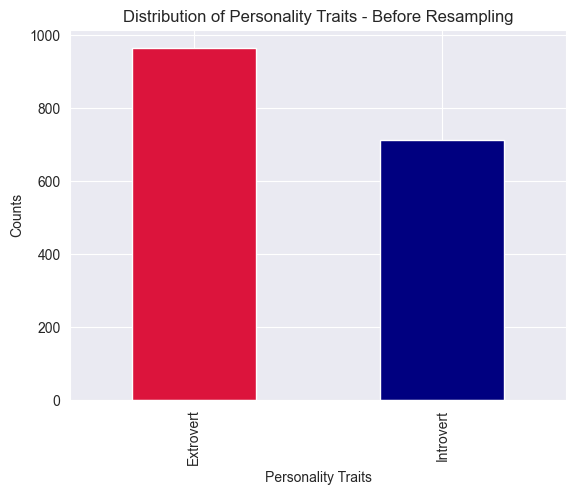

In [26]:
# class distribution before resampling 
y_train.value_counts().plot(kind = "bar", color = ['crimson', 'navy'])
plt.title("Distribution of Personality Traits - Before Resampling")
plt.xlabel("Personality Traits")
plt.ylabel("Counts")
plt.show()

In [27]:
# use SMOTE-Tomek resampling technique to balance the class variable
smt = SMOTETomek(random_state = 2025)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

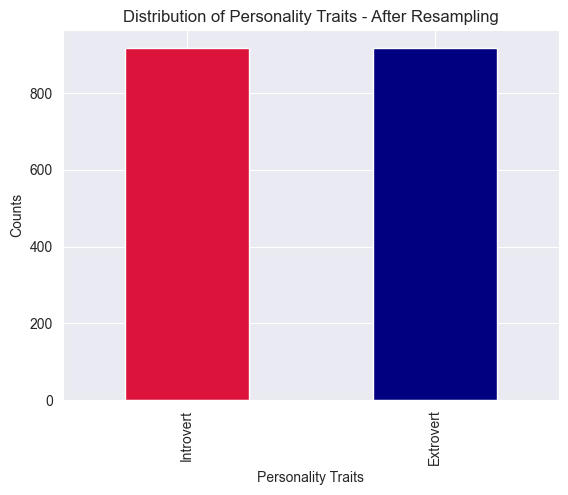

In [28]:
# class distribution after resampling
y_train_res.value_counts().plot(kind = "bar", color = ['crimson', 'navy'])
plt.title("Distribution of Personality Traits - After Resampling")
plt.xlabel("Personality Traits")
plt.ylabel("Counts")
plt.show()

## Model Fine-Tuning and Evaluation

In [29]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2025)

### Random Forest Classifier

In [30]:
param_grid_rfc = {'n_estimators': [50, 100, 150], 
                  'max_depth': [5, 6, 7, 8, 9, 10],
                  'min_samples_split': [2, 3, 4, 5], 
                  'min_samples_leaf': [2, 3, 4, 5]}

grid_search_rfc = GridSearchCV(estimator = RandomForestClassifier(random_state = 2025), 
                               param_grid = param_grid_rfc, 
                               cv = cv, 
                               scoring = 'accuracy', 
                               n_jobs = 1, 
                               verbose = 3, 
                               return_train_score = True)

grid_search_rfc.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.930, test=0.938) total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.929, test=0.916) total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.927, test=0.943) total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.936, test=0.918) total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.929, test=0.924) total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.931, test=0.938) total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.929, test=0.916) t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=RandomForestClassifier(random_state=2025), n_jobs=1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [31]:
# print the best hyperparameters 
print("Best hyperparameters: {}".format(grid_search_rfc.best_params_))
print("best Score: {}".format(grid_search_rfc.best_score_))

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
best Score: 0.9319171306717214


In [32]:
# perform prediction on the test set 
predict_rfc = grid_search_rfc.predict(X_test)

In [33]:
# print the classification report
print(classification_report(y_test, predict_rfc))

              precision    recall  f1-score   support

   Extrovert       0.95      0.92      0.94       236
   Introvert       0.90      0.94      0.92       184

    accuracy                           0.93       420
   macro avg       0.93      0.93      0.93       420
weighted avg       0.93      0.93      0.93       420



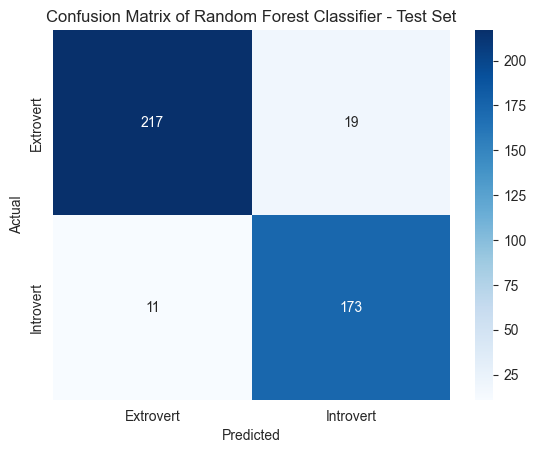

In [34]:
# display the confusion matrix 
conf_matrix_rfc = confusion_matrix(y_test, predict_rfc)
sns.heatmap(conf_matrix_rfc, cmap = "Blues", annot = True, fmt = "d", xticklabels = ['Extrovert', 'Introvert'], yticklabels = ['Extrovert', 'Introvert'])
plt.title("Confusion Matrix of Random Forest Classifier - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Gradient Boosting Classifier

In [35]:
param_grid_gbc = {'n_estimators': [50, 100, 150], 
                  'max_depth': [5, 6, 7, 8, 9, 10],
                  'min_samples_split': [2, 3, 4, 5], 
                  'min_samples_leaf': [2, 3, 4, 5]}

grid_search_gbc = GridSearchCV(estimator = GradientBoostingClassifier(random_state = 2025), 
                               param_grid = param_grid_rfc, 
                               cv = cv, 
                               scoring = 'accuracy', 
                               n_jobs = 1, 
                               verbose = 3, 
                               return_train_score = True)

grid_search_gbc.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.956, test=0.932) total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.951, test=0.921) total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.952, test=0.951) total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.952, test=0.921) total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.958, test=0.932) total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.972, test=0.924) total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.978, test=0.907) t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=2025), n_jobs=1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [36]:
# print the best hyperparameters 
print("Best hyperparameters: {}".format(grid_search_gbc.best_params_))
print("best Score: {}".format(grid_search_gbc.best_score_))

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
best Score: 0.9346404454448525


In [37]:
# perform prediction on the test set 
predict_gbc = grid_search_gbc.predict(X_test)

In [38]:
# print the classification report
print(classification_report(y_test, predict_gbc))

              precision    recall  f1-score   support

   Extrovert       0.95      0.92      0.93       236
   Introvert       0.90      0.94      0.92       184

    accuracy                           0.93       420
   macro avg       0.92      0.93      0.93       420
weighted avg       0.93      0.93      0.93       420



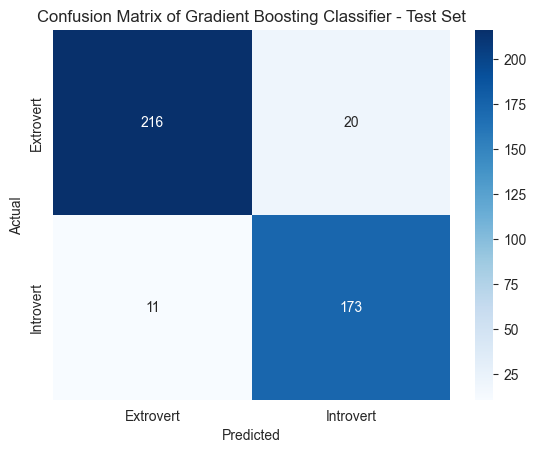

In [39]:
# display the confusion matrix 
conf_matrix_gbc = confusion_matrix(y_test, predict_gbc)
sns.heatmap(conf_matrix_gbc, cmap = "Blues", annot = True, fmt = "d", xticklabels = ['Extrovert', 'Introvert'], yticklabels = ['Extrovert', 'Introvert'])
plt.title("Confusion Matrix of Gradient Boosting Classifier - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Extra Trees Classifier

In [40]:
param_grid_etc = {'n_estimators': [50, 100, 150], 
                  'max_depth': [5, 6, 7, 8, 9, 10],
                  'min_samples_split': [2, 3, 4, 5], 
                  'min_samples_leaf': [2, 3, 4, 5]}

grid_search_etc = GridSearchCV(estimator = RandomForestClassifier(random_state = 2025), 
                               param_grid = param_grid_rfc, 
                               cv = cv, 
                               scoring = 'accuracy', 
                               n_jobs = 1, 
                               verbose = 3, 
                               return_train_score = True)

grid_search_etc.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.930, test=0.938) total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.929, test=0.916) total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.927, test=0.943) total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.936, test=0.918) total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.929, test=0.924) total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.931, test=0.938) total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.929, test=0.916) t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=RandomForestClassifier(random_state=2025), n_jobs=1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [41]:
# print the best hyperparameters 
print("Best hyperparameters: {}".format(grid_search_etc.best_params_))
print("best Score: {}".format(grid_search_etc.best_score_))

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
best Score: 0.9319171306717214


In [42]:
# perform prediction on the test set 
predict_etc = grid_search_etc.predict(X_test)

In [43]:
# print the classification report
print(classification_report(y_test, predict_etc))

              precision    recall  f1-score   support

   Extrovert       0.95      0.92      0.94       236
   Introvert       0.90      0.94      0.92       184

    accuracy                           0.93       420
   macro avg       0.93      0.93      0.93       420
weighted avg       0.93      0.93      0.93       420



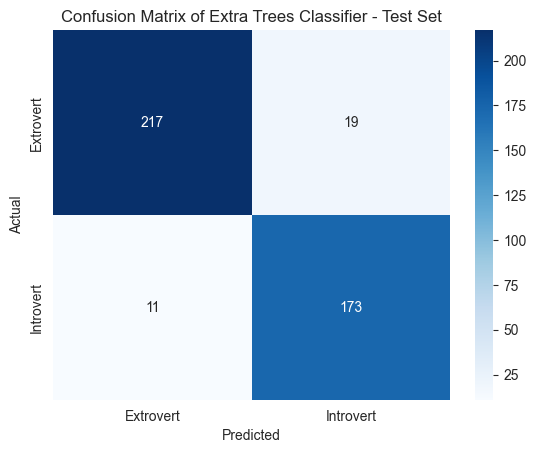

In [44]:
# display the confusion matrix 
conf_matrix_etc = confusion_matrix(y_test, predict_etc)
sns.heatmap(conf_matrix_etc, cmap = "Blues", annot = True, fmt = "d", xticklabels = ['Extrovert', 'Introvert'], yticklabels = ['Extrovert', 'Introvert'])
plt.title("Confusion Matrix of Extra Trees Classifier - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()